# BNL Development Notebook

This notebook is for developing and testing the BNL package.


In [1]:
%load_ext autoreload
%autoreload 2

import bnl

(<Figure size 600x60 with 1 Axes>, <Axes: xlabel='Time (s)'>)

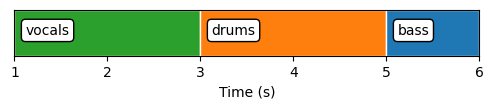

In [2]:
# Create a Segmentation object using the new construction utility
seg = bnl.Segmentation.from_boundaries((1,3,5,6), labels=['vocals', 'drums', 'bass'])
seg.plot()

(0.0, 2.0)

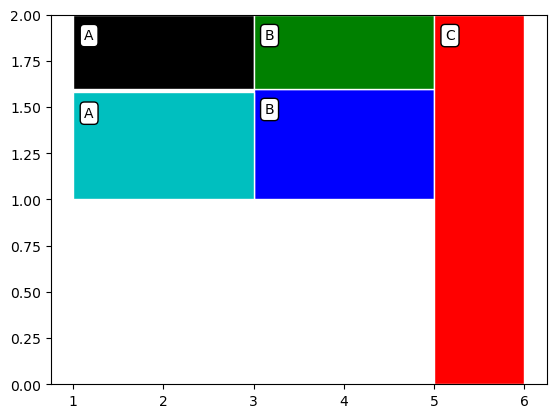

In [41]:
seg = bnl.Segmentation.from_boundaries([1, 3, 5, 6], labels=["A", "B", "C", "D"])

fig, ax = seg[0].plot(ymin=0.8, ymax=1.0, color='k')

seg[1].plot(ax=ax, ymin=0.5, ymax=0.8, color='b')
seg[1].plot(ax=ax, ymin=0.8, ymax=1.0, color='g')
seg[2].plot(ax=ax, color='r')
seg[0].plot(ax=ax, ymin=0.5, ymax=0.79, color='c')

ax.set_ylim(0, 2)


Text(0.5, 1.0, 'TimeSpan([1.0-3.0s])')

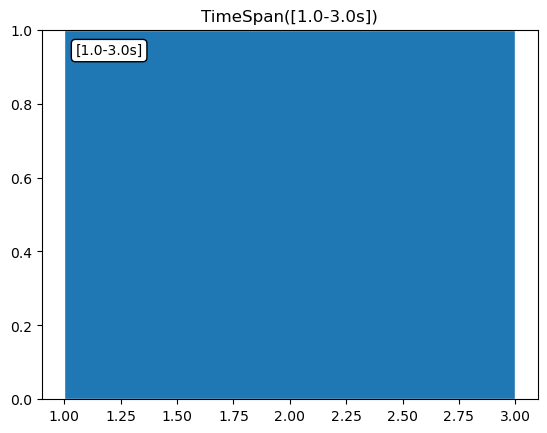

In [39]:
span = bnl.TimeSpan(1, 3)

fig, ax = span.plot()
ax.set_title(repr(span))


## Todo items:
- [x] Add a `Hierarchy` class to core.py
- [x] Add a module for dealing with jams and datasets, currently only SALAMI. 
- [ ] Add a `Hierarchy.plot()`
- [ ] add eval.py a module for evaluating metrics.
    - [ ] get the fast and mir_eval version of the flat metrics working. eval/flat.py
    - [ ] get the fast and mir_eval version of L-measure and T-measure working. eval/hier.py
    - [ ] get bmeasure working. eval/hier.py
    - [ ] logic, processing, and hidden functions in eval/utils.py
- [ ] Boundary salience curve for Hierarchy, and coding and decoding to monotonic hierarchies.

So the consideration is whether to make aother class that's Monotonic Hierarchy, or to add casting methods to the Hierarchy class.

Yea.. I think we should have a different class for Monotonic Hierarchy, and then add casting methods to the Hierarchy class for conversion.




## More thinking on API

Good progress

We then introduce ProperHierarchy, which inherits from Hierarchy, and has monotonoic boundaires.

ProperHierarchy has Boundary to Layer mapping, and has monotonic boundaires across its levels.

Let's only do input checking during construction of objects, so assumn things are well formed elsewhere.

Ok, idea about plotting: the TimeSpan should also have a plot function, that draws a rect objects on an axis, if its provided; it can take a bunch of style args. then this should be called in the segmentation.plot function.  Right now. The drawing of the rects are just in a forloop.
This is a nice to have refactor that benefits my mental model.

We need a constructor in core.py for seg_from_jams_anno, where anno is either a open_segment annotation, in which case the output would be a Segmentation, or a multilevel one, in whichcase the output would be a Hierarchy. actually hier_from_jams_anno for the hierarchy one.
look at formatting.py from old version to see if anything else is needed.




In [ ]:
## Add a `Hierarchy` class to core.py